# Search the best Machine Learning Algorithms to predict

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
start = time.time()

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

np.set_printoptions(precision=4)

In [4]:
data = pd.read_csv('./data/f1_df_final.csv')

In [5]:
data.head()

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,grid,podium,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
0,1983,1,False,False,True,False,False,keke_rosberg,1,15,...,0,0,0,0,0,0,0,0,0,1
1,1983,1,False,False,True,False,False,prost,2,6,...,0,0,0,1,0,0,0,0,0,0
2,1983,1,False,False,True,False,False,tambay,3,4,...,0,0,0,0,0,0,0,0,0,0
3,1983,1,False,False,True,False,False,piquet,4,1,...,0,0,0,0,0,0,0,0,0,0
4,1983,1,False,False,True,False,False,warwick,5,7,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(data)

14272

## Directory to store Models

In [7]:
import os
if not os.path.exists('./models'):
    os.mkdir('./models')

## Create Training Datasets

In [8]:
df = data.copy()
df.podium = df.podium.map(lambda x: 1 if x == 1 else 0)

train = df[df.season < 2019]
X_train = train.drop(['driver', 'podium'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)


In [9]:
X_train.describe()

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,driver_points,driver_wins,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
count,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,...,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04,13880.000000,1.388000e+04,1.388000e+04,1.388000e+04,1.388000e+04
mean,4.193636e-15,1.474325e-16,-4.914417e-17,-1.638139e-17,9.828833e-17,2.457208e-17,3.890580e-17,1.064790e-16,6.552555e-17,2.457208e-17,...,-1.638139e-17,1.638139e-17,-1.638139e-17,1.638139e-17,-2.457208e-17,0.000000,3.276278e-17,-1.638139e-17,-3.276278e-17,3.890580e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-1.647288e+00,-1.609202e+00,-7.956967e-01,-1.538646e-01,-5.570451e-01,-3.374541e-01,-3.492547e-01,-1.609252e+00,-4.655381e-01,-3.106935e-01,...,-2.167811e-01,-1.093473e-01,-1.943116e-01,-2.035106e-01,-2.396732e-01,-0.163875,-1.855569e-01,-1.400486e-01,-1.876243e-01,-3.114050e-01
25%,-8.898732e-01,-8.229818e-01,-7.956967e-01,-1.538646e-01,-5.570451e-01,-3.374541e-01,-3.492547e-01,-8.685026e-01,-4.655381e-01,-3.106935e-01,...,-2.167811e-01,-1.093473e-01,-1.943116e-01,-2.035106e-01,-2.396732e-01,-0.163875,-1.855569e-01,-1.400486e-01,-1.876243e-01,-3.114050e-01
50%,-3.778204e-02,-3.676201e-02,-7.956967e-01,-1.538646e-01,-5.570451e-01,-3.374541e-01,-3.492547e-01,2.039731e-02,-3.900833e-01,-3.106935e-01,...,-2.167811e-01,-1.093473e-01,-1.943116e-01,-2.035106e-01,-2.396732e-01,-0.163875,-1.855569e-01,-1.400486e-01,-1.876243e-01,-3.114050e-01
75%,9.089859e-01,7.494578e-01,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-3.492547e-01,7.611472e-01,-1.280955e-02,-3.106935e-01,...,-2.167811e-01,-1.093473e-01,-1.943116e-01,-2.035106e-01,-2.396732e-01,-0.163875,-1.855569e-01,-1.400486e-01,-1.876243e-01,-3.114050e-01
max,1.666400e+00,2.321897e+00,1.256760e+00,6.499221e+00,1.795187e+00,2.963366e+00,2.863240e+00,2.242647e+00,9.167519e+00,1.089041e+01,...,4.612948e+00,9.145171e+00,5.146372e+00,4.913749e+00,4.172348e+00,6.102206,5.389183e+00,7.140379e+00,5.329801e+00,3.211253e+00


# Create Test Datasets for Regression

In [10]:
for circuit in df[df.season == 2019]['round'].unique():

    test = df[(df.season == 2019) & (df['round'] == circuit)]
    X_test = test.drop(['driver', 'podium'], axis = 1)
    y_test = test.podium

    #scaling
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [11]:
X_test.describe()

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,driver_points,driver_wins,...,constructor_minardi,constructor_prost,constructor_red_bull,constructor_renault,constructor_sauber,constructor_team_lotus,constructor_toro_rosso,constructor_toyota,constructor_tyrrell,constructor_williams
count,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,...,2.000000e+01,2.000000e+01,20.000000,20.000000,2.000000e+01,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000
mean,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,-0.201828,2.097408,0.550930,...,-2.167811e-01,-1.093473e-01,0.339757,0.308215,-2.396732e-01,-1.638752e-01,0.371917,-1.400486e-01,-0.187624,0.040861
std,0.000000,4.556259e-16,2.278130e-16,2.847662e-17,1.139065e-16,5.695324e-17,0.000000,0.876467,2.947319,2.073180,...,2.847662e-17,1.423831e-17,1.643828,1.575059,2.847662e-17,2.847662e-17,1.715869,2.847662e-17,0.000000,1.084251
min,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,-1.609252,-0.465538,-0.310694,...,-2.167811e-01,-1.093473e-01,-0.194312,-0.203511,-2.396732e-01,-1.638752e-01,-0.185557,-1.400486e-01,-0.187624,-0.311405
25%,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,-0.905540,0.056357,-0.310694,...,-2.167811e-01,-1.093473e-01,-0.194312,-0.203511,-2.396732e-01,-1.638752e-01,-0.185557,-1.400486e-01,-0.187624,-0.311405
50%,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,-0.201828,0.678859,-0.310694,...,-2.167811e-01,-1.093473e-01,-0.194312,-0.203511,-2.396732e-01,-1.638752e-01,-0.185557,-1.400486e-01,-0.187624,-0.311405
75%,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,0.501885,2.772728,-0.095288,...,-2.167811e-01,-1.093473e-01,-0.194312,-0.203511,-2.396732e-01,-1.638752e-01,-0.185557,-1.400486e-01,-0.187624,-0.311405
max,1.761077,2.321897e+00,1.256760e+00,-1.538646e-01,-5.570451e-01,-3.374541e-01,-0.349255,1.205597,9.268125,8.305542,...,-2.167811e-01,-1.093473e-01,5.146372,4.913749,-2.396732e-01,-1.638752e-01,5.389183,-1.400486e-01,-0.187624,3.211253


In [12]:
y_test.describe()

count    20.000000
mean      0.050000
std       0.223607
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: podium, dtype: float64

In [82]:
print(X_test.columns)

Index(['season', 'round', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qualifying_time', 'driver_age',
       'circuit_id_BAK', 'circuit_id_adelaide', 'circuit_id_albert_park',
       'circuit_id_americas', 'circuit_id_bahrain', 'circuit_id_brands_hatch',
       'circuit_id_catalunya', 'circuit_id_detroit', 'circuit_id_estoril',
       'circuit_id_galvez', 'circuit_id_hockenheimring',
       'circuit_id_hungaroring', 'circuit_id_imola', 'circuit_id_indianapolis',
       'circuit_id_interlagos', 'circuit_id_istanbul',
       'circuit_id_jacarepagua', 'circuit_id_jerez', 'circuit_id_kyalami',
       'circuit_id_magny_cours', 'circuit_id_marina_bay', 'circuit_id_monaco',
       'circuit_id_monza', 'circuit_id_nurburgring',
       'circuit_id_osterreichring', 'circuit_id_phoenix',
       'circuit_id_r

## Functions to compare Model Score between Training & Test Datasets

In [13]:
def score_classification(model):
    score = 0
    acc = 0
    for circuit in df[df.season == 2019]['round'].unique():

        test = df[(df.season == 2019) & (df['round'] == circuit)]
        X_test = test.drop(['driver', 'podium'], axis = 1)
        y_test = test.podium

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict_proba(X_test), columns = ['proba_0', 'proba_1'])
        prediction_df['actual'] = y_test.reset_index(drop = True)
        prediction_df.sort_values('proba_1', ascending = False, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)

        # Evaluate the classifier precision using the test set
        score += precision_score(prediction_df.actual, prediction_df.predicted)
        
        # Evaluate the classifier accuracy using the test set
        acc += accuracy_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.season == 2019]['round'].unique().max()
    model_acc = acc / df[df.season == 2019]['round'].unique().max()
    return model_score, model_acc

In [14]:
import pickle

def save_model(model, model_filepath):
    """
    Export your model as a pickle file.
    Saves trained model as pickle file to be loaded later.
    
    """
    
    filename = model_filepath
    pickle.dump(model, open(filename, 'wb'))

## Structure to store Models Results

In [15]:
comparison_dict ={'modelname':[],
                  'params': [],
                  'score': [],
                  'model':[]}

## --------------------------------------
## Classification ML
## --------------------------------------

## Logistic Regression

In [16]:
penalty='l2'
solver='liblinear'
c=10.0

In [17]:
# Logistic Regression

model_params = (penalty, solver, c)
model = LogisticRegression(penalty = penalty, solver = solver, C = c, max_iter = 10000)
model.fit(X_train, y_train)

model_score, model_acc = score_classification(model)

comparison_dict['modelname'].append('logistic_regression')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [18]:
print(model_score)

0.5714285714285714


In [19]:
print(model_acc)

0.9526733500417712


In [20]:
model_filepath='./models/{}.pkl'.format('logistic_regression')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/logistic_regression.pkl


In [21]:
# get importance
importance = model.coef_[0]
importance

array([-2.2694e-01, -1.7354e-01,  2.8404e-04, -6.0928e-03,  1.2251e-02,
        2.9918e-03,  2.6760e-02, -2.9075e+00,  3.7240e-01,  2.4918e-02,
       -1.2878e-01, -4.2149e-01,  1.8333e-01, -2.2746e-01, -5.6369e-01,
        1.9438e-01, -1.1070e-03, -3.1973e-02, -4.8921e-02, -1.7921e-02,
       -6.6332e-03,  1.9297e-02, -2.5435e-02,  1.7515e-02, -2.0371e-02,
       -1.7501e-02, -1.9764e-02, -2.4484e-02, -7.1499e-03,  3.1086e-03,
       -1.3975e-02, -6.9478e-03, -1.8698e-02, -2.4780e-02, -3.8184e-03,
       -1.1742e-02, -3.2525e-02, -1.1901e-02, -1.5051e-02, -1.0202e-02,
        3.6735e-03, -1.3587e-02,  1.0311e-02, -3.8877e-03, -2.0172e-02,
       -4.5690e-03, -3.2125e-03, -2.8939e-02, -1.7317e-03, -1.4117e-02,
       -3.5614e-02, -7.0741e-03, -2.5314e-02, -2.4732e-02, -2.4280e-02,
        5.9715e-03, -4.6467e-01, -1.0473e-01, -9.9377e-02,  1.0905e-02,
       -4.4066e-02,  1.2270e-01,  8.7331e-02,  8.5550e-02, -5.4161e-02,
       -9.4023e-02,  1.4168e-01, -2.6932e-01, -4.7063e-01, -2.12

In [22]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.22694
Feature: 1, Score: -0.17354
Feature: 2, Score: 0.00028
Feature: 3, Score: -0.00609
Feature: 4, Score: 0.01225
Feature: 5, Score: 0.00299
Feature: 6, Score: 0.02676
Feature: 7, Score: -2.90747
Feature: 8, Score: 0.37240
Feature: 9, Score: 0.02492
Feature: 10, Score: -0.12878
Feature: 11, Score: -0.42149
Feature: 12, Score: 0.18333
Feature: 13, Score: -0.22746
Feature: 14, Score: -0.56369
Feature: 15, Score: 0.19438
Feature: 16, Score: -0.00111
Feature: 17, Score: -0.03197
Feature: 18, Score: -0.04892
Feature: 19, Score: -0.01792
Feature: 20, Score: -0.00663
Feature: 21, Score: 0.01930
Feature: 22, Score: -0.02543
Feature: 23, Score: 0.01752
Feature: 24, Score: -0.02037
Feature: 25, Score: -0.01750
Feature: 26, Score: -0.01976
Feature: 27, Score: -0.02448
Feature: 28, Score: -0.00715
Feature: 29, Score: 0.00311
Feature: 30, Score: -0.01397
Feature: 31, Score: -0.00695
Feature: 32, Score: -0.01870
Feature: 33, Score: -0.02478
Feature: 34, Score: -0.00382
Featur

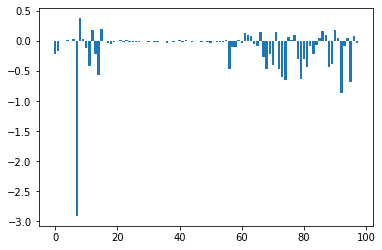

In [23]:
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [24]:
print(X_train.columns)

Index(['season', 'round', 'weather_warm', 'weather_cold', 'weather_dry',
       'weather_wet', 'weather_cloudy', 'grid', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qualifying_time', 'driver_age',
       'circuit_id_BAK', 'circuit_id_adelaide', 'circuit_id_albert_park',
       'circuit_id_americas', 'circuit_id_bahrain', 'circuit_id_brands_hatch',
       'circuit_id_catalunya', 'circuit_id_detroit', 'circuit_id_estoril',
       'circuit_id_galvez', 'circuit_id_hockenheimring',
       'circuit_id_hungaroring', 'circuit_id_imola', 'circuit_id_indianapolis',
       'circuit_id_interlagos', 'circuit_id_istanbul',
       'circuit_id_jacarepagua', 'circuit_id_jerez', 'circuit_id_kyalami',
       'circuit_id_magny_cours', 'circuit_id_marina_bay', 'circuit_id_monaco',
       'circuit_id_monza', 'circuit_id_nurburgring',
       'circuit_id_osterreichring', 'circuit_id_phoenix',
       'circuit_id_r

In [25]:
# Output importances 
imp_list = []
for i,v in enumerate(importance):
    imp_list.append((i, v))
sorted_list = sorted(imp_list, key=lambda x: x[1], reverse=True)
print('The top 10 Feature importances are:' '\n')
for f, i in sorted_list[:10]:
    print(f'{X_train.columns[f]}, Score: {round(i, 3)}')

The top 10 Feature importances are:

driver_points, Score: 0.372
driver_age, Score: 0.194
constructor_wins, Score: 0.183
constructor_red_bull, Score: 0.181
constructor_mclaren, Score: 0.166
nationality_Spanish, Score: 0.144
nationality_German, Score: 0.142
nationality_British, Score: 0.123
constructor_mercedes, Score: 0.101
constructor_ferrari, Score: 0.096


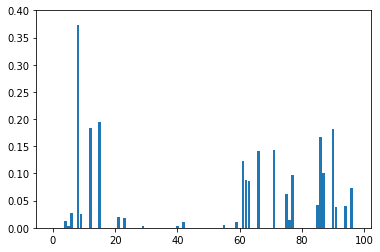

In [26]:
from matplotlib import pyplot
# Plot importances:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.ylim(0, 0.40)
pyplot.show()

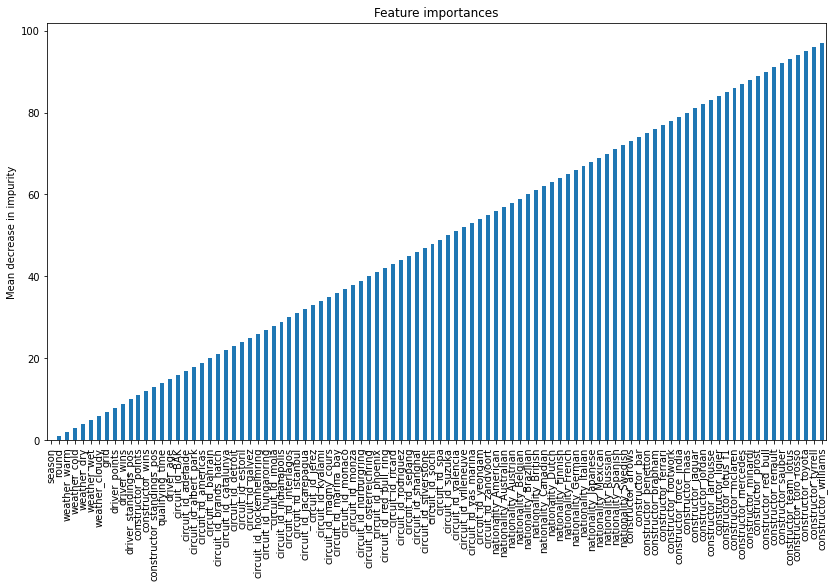

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
lr_importances = pd.Series([x for x in range(len(importance))], index=X_train.columns)

fig, ax = plt.subplots()
lr_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Random Forest Classifier

In [27]:
criterion='gini'
max_features='auto'
max_depth=13.0

In [28]:
# Random Forest Classifier
model_params = (criterion, max_features, max_depth)
model = RandomForestClassifier(criterion = criterion, max_features = max_features, max_depth = max_depth)
model.fit(X_train, y_train)

model_score,model_acc = score_classification(model)

comparison_dict['modelname'].append('random_forest_classifier')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [29]:
print(model_score)

0.38095238095238093


In [30]:
print(model_acc)

0.9319061542745753


In [31]:
model_filepath='./models/{}.pkl'.format('random_forest_classifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/random_forest_classifier.pkl


## SVM Classifier

In [32]:
gamma=0.0001438449888287663
c=0.029763514416313176
kernel='rbf'

In [33]:
# Support Vector Machines

model_params = (gamma, c, kernel)
model = svm.SVC(probability = True, gamma = gamma, C = c, kernel = kernel )
model.fit(X_train, y_train)

model_score,model_acc = score_classification(model)

comparison_dict['modelname'].append('svm_classifier')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [34]:
print(model_score)

0.42857142857142855


In [35]:
print(model_acc)

0.9383876357560568


In [36]:
model_filepath='./models/{}.pkl'.format('svm_classifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/svm_classifier.pkl


## Neural Network : MLP Classifier

In [37]:
hidden_layer_sizes = (75, 25, 50, 10)
activation = 'identity'
solver = 'lbfgs'
alpha = 0.01623776739188721

In [38]:
# Neural network

model_params = (hidden_layer_sizes, activation, solver, alpha )
model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                      activation = activation, solver = solver, alpha = alpha, random_state = 1)
model.fit(X_train, y_train)

model_score, model_acc = score_classification(model)

comparison_dict['modelname'].append('neural_network_classifier')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [39]:
print(model_score)

0.6190476190476191


In [40]:
print(model_acc)

0.957685881370092


In [41]:
model_filepath='./models/{}.pkl'.format('neural_network_classifier')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/neural_network_classifier.pkl


In [42]:
# get importance
importance = model.coefs_[0]
importance

array([[-0.0464,  0.0975, -0.196 , ..., -0.1404,  0.1092, -0.0401],
       [-0.1175,  0.1462, -0.0525, ...,  0.0781,  0.019 , -0.1718],
       [-0.1559,  0.1649,  0.0277, ..., -0.1313,  0.1159, -0.0555],
       ...,
       [-0.1777, -0.0107,  0.0239, ..., -0.0505, -0.0103,  0.1615],
       [ 0.1071,  0.0939, -0.0988, ...,  0.0698, -0.0225, -0.0168],
       [-0.0737,  0.1084, -0.0053, ...,  0.1946,  0.0066,  0.0782]])

In [43]:
print("Number of Coefs : ", len(model.coefs_))

[weights.shape for weights in model.coefs_]

Number of Coefs :  5


[(98, 75), (75, 25), (25, 50), (50, 10), (10, 1)]

In [44]:
print("Number of Intercepts : ", len(model.intercepts_))

[intercept.shape for intercept in model.intercepts_]

Number of Intercepts :  5


[(75,), (25,), (50,), (10,), (1,)]

In [45]:
print("Number of Iterations for Which Estimator Ran : ", model.n_iter_)

Number of Iterations for Which Estimator Ran :  63


In [46]:
print("Name of Output Layer Activation Function : ", model.out_activation_)

Name of Output Layer Activation Function :  logistic


In [47]:
#matrix
print('Hidden Weights:')
for l in model.coefs_[0].T:
    print('-', l.tolist())
print('Hidden Bias')
print(model.intercepts_[0].tolist())

print('Output Weights:')
for l in model.coefs_[1].T[0]:
    print('-', str([l]))
print('Output Bias')
print(model.intercepts_[1])

Hidden Weights:
- [-0.046375542992811714, -0.11753005201318693, -0.1559390746673125, 0.1635688117712782, 0.13181127630169306, -0.04763335532772077, -0.12690525099284283, -0.2311226571336953, 0.08773730659180767, 0.17390212128681384, -0.0020067632465597665, -0.07093378378961604, -0.10179866735600676, -0.08683447373888431, -0.10453955120198855, 0.1606177973376548, 0.1240361944784894, -0.0380539439297325, -0.1685939005764353, 0.17868810978496252, -0.13276371190793215, 0.09179194805457135, -0.10243013227460286, -0.10048455992719581, 0.17276314857165595, 0.012012395919861455, -0.13870971822063402, 0.013738957122900837, -0.03423074400465635, -0.12667307838968317, 0.08998378489394095, -0.05619321694420162, 0.15127658475821026, -0.12191198767795573, 0.17163126725019917, -0.033247228360230786, 0.07693537860494767, -0.1084603385794496, 0.02081825767137017, 0.15859286232413883, 0.10166375918789484, 0.146583548788174, -0.13076229750939025, 0.13672347522232534, -0.10286779528156814, -0.025905653888

In [48]:
# display the network weights for each layer rows in each table represent a
# neuron, and columns represent the input from the previous layer, a cell
# gives us the weight to use for a given neuron + input value
print('Network weights, w/o bias, input layer is layer #0:')
for i, weight_matrix in enumerate(model.coefs_, start=1):
    print('Layer #%d' % i)
    if i == 1:
        weight_matrix_df = pd.DataFrame(weight_matrix.transpose())
        #weight_matrix_df.columns = df.drop('species', axis=1).columns

    else:
        weight_matrix_df = pd.DataFrame(weight_matrix.transpose())
        #weight_matrix_df.columns = ['Neuron #%d from layer #%d' % (c, i - 1)
        #                            for c in weight_matrix_df.columns]

    weight_matrix_df.index = weight_matrix_df.index.map(
        lambda x: 'Neuron #%d' % x)
    print(weight_matrix_df)

    print

Network weights, w/o bias, input layer is layer #0:
Layer #1
                  0         1         2         3         4         5   \
Neuron #0  -0.046376 -0.117530 -0.155939  0.163569  0.131811 -0.047633   
Neuron #1   0.097479  0.146159  0.164854  0.028577  0.111511  0.134684   
Neuron #2  -0.195994 -0.052458  0.027734  0.140935  0.086758  0.071743   
Neuron #3  -0.090209  0.101280 -0.105795  0.130712  0.041030  0.071690   
Neuron #4  -0.128401  0.086055 -0.091217  0.149941 -0.125625 -0.115201   
...              ...       ...       ...       ...       ...       ...   
Neuron #70  0.141270 -0.140373 -0.117467 -0.163379 -0.037675  0.151892   
Neuron #71 -0.136761 -0.105084 -0.062210 -0.043671 -0.181666  0.108688   
Neuron #72 -0.140428  0.078138 -0.131296 -0.151145 -0.125271  0.152572   
Neuron #73  0.109220  0.019017  0.115910  0.180405  0.086978 -0.132335   
Neuron #74 -0.040108 -0.171768 -0.055456 -0.116538 -0.174496 -0.125847   

                  6         7         8         9 

## --------------------------------------
## Regression ML
## --------------------------------------

In [49]:
df = data.copy()

train = df[df.season <2019]
X_train = train.drop(['driver', 'podium'], axis = 1)
y_train = train.podium

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

In [50]:
def score_regression(model):
    score = 0
    acc = 0
    for circuit in df[df.season == 2019]['round'].unique():

        test = df[(df.season == 2019) & (df['round'] == circuit)]
        X_test = test.drop(['driver', 'podium'], axis = 1)
        y_test = test.podium

        #scaling
        X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

        # make predictions
        prediction_df = pd.DataFrame(model.predict(X_test), columns = ['results'])
        prediction_df['podium'] = y_test.reset_index(drop = True)
        prediction_df['actual'] = prediction_df.podium.map(lambda x: 1 if x == 1 else 0)
        prediction_df.sort_values('results', ascending = True, inplace = True)
        prediction_df.reset_index(inplace = True, drop = True)
        prediction_df['predicted'] = prediction_df.index
        prediction_df['predicted'] = prediction_df.predicted.map(lambda x: 1 if x == 0 else 0)

        score += precision_score(prediction_df.actual, prediction_df.predicted)
        acc += accuracy_score(prediction_df.actual, prediction_df.predicted)

    model_score = score / df[df.season == 2019]['round'].unique().max()
    model_acc = acc / df[df.season == 2019]['round'].unique().max()
    return model_score,model_acc

# Linear Regression

In [51]:
fit_intercept='True'

In [52]:
# Linear Regression

model_params = (fit_intercept)
model = LinearRegression(fit_intercept = fit_intercept)
model.fit(X_train, y_train)

model_score, model_acc = score_regression(model)
            
comparison_dict['modelname'].append('linear_regression')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [53]:
print(model_score)

0.47619047619047616


In [54]:
print(model_acc)

0.942119186856029


In [55]:
model_filepath='./models/{}.pkl'.format('linear_regression')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/linear_regression.pkl


## Random Forest Regressor

In [56]:
criterion='mse'
max_features=None
max_depth= 9.0

In [57]:
# Random Forest Regressor

model_params = (criterion, max_features, max_depth)
model = RandomForestRegressor(criterion = criterion,
                              max_features = max_features, max_depth = max_depth, random_state = 1)
model.fit(X_train, y_train)

model_score,model_acc = score_regression(model)

comparison_dict['modelname'].append('random_forest_regressor')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [58]:
print(model_score)

0.5238095238095238


In [59]:
print(model_acc)

0.9479114452798663


In [60]:
model_filepath='./models/{}.pkl'.format('random_forest_regressor')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/random_forest_regressor.pkl


## SVM Regressor

In [61]:
gamma=0.001
c=1.0
kernel='rbf'

In [62]:
## Support Vector Machines

model_params = (gamma, c, kernel)
model = svm.SVR(gamma = gamma, C = c, kernel = kernel)
model.fit(X_train, y_train)

model_score, model_acc = score_regression(model)

comparison_dict['modelname'].append('svm_regressor')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [63]:
print(model_score)

0.5238095238095238


In [64]:
print(model_acc)

0.9476608187134504


In [65]:
model_filepath='./models/{}.pkl'.format('svm_regressor')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/svm_regressor.pkl


## Neural Network Regressor

In [66]:
hidden_layer_sizes=[75, 30, 50, 10, 3]
activation='tanh'
solver='sgd'
alpha=1.623776739188721

In [67]:
# Neural network

model_params = (hidden_layer_sizes, activation, solver, alpha )
model = MLPRegressor(hidden_layer_sizes = hidden_layer_sizes,
                      activation = activation, solver = solver, alpha = alpha, random_state = 1)
model.fit(X_train, y_train)

model_score, model_acc = score_regression(model)

comparison_dict['modelname'].append('nn_regressor')
comparison_dict['params'].append(model_params)
comparison_dict['score'].append(model_score)
comparison_dict['model'].append(model)

In [68]:
print(model_score)

0.3333333333333333


In [69]:
print(model_acc)

0.9275549986076302


In [70]:
model_filepath='./models/{}.pkl'.format('nn_regressor')
print('Saving model ...\n    MODEL: {}'.format(model_filepath))
save_model(model, model_filepath)

Saving model ...
    MODEL: ./models/nn_regressor.pkl


## Results Analysis

In [71]:
df_box = pd.DataFrame(comparison_dict).groupby('modelname')['score'].aggregate([min, np.median, max])
df_box

,min,median,max
modelname,,,
linear_regression,0.476190,0.476190,0.476190
logistic_regression,0.571429,0.571429,0.571429
neural_network_classifier,0.619048,0.619048,0.619048
nn_regressor,0.333333,0.333333,0.333333
random_forest_classifier,0.380952,0.380952,0.380952
random_forest_regressor,0.523810,0.523810,0.523810
svm_classifier,0.428571,0.428571,0.428571
svm_regressor,0.523810,0.523810,0.523810


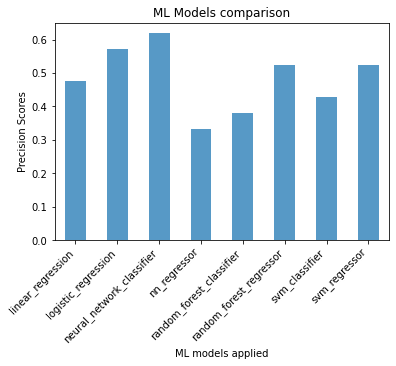

In [72]:
import matplotlib.pyplot as plt
#import pandas as pd

df_model = pd.DataFrame(comparison_dict).groupby('modelname')['score'].max()
#ax = df_model.plot.bar(rot=0)

#df.groupby('state')['name'].nunique().plot(kind='bar')
df_model.plot(kind='bar',alpha=0.75, rot=0)
plt.rcParams['figure.figsize'] = [11.7, 8.27]
plt.title('ML Models comparison'); 
plt.ylabel('Precision Scores');
plt.xlabel('ML models applied');

plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
)
plt.show()

In [73]:
end = time.time()

In [74]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:02:51.980462'

In [75]:
print(str(end - start)+" seconds")

171.9804618358612 seconds


## Save all Models in JSON Dict

In [76]:
comparison_dict_json ={'modelname':[],
                  'params': [],
                  'score': []}

In [77]:
comparison_dict_json['modelname']=comparison_dict['modelname']
comparison_dict_json['params']=comparison_dict['params']
comparison_dict_json['score']=comparison_dict['score']

In [78]:
import json

json = json.dumps(comparison_dict_json)
f = open("./data/f1_mlmodels_dict.json","w")
f.write(json)
f.close()

## Load Models from JSON Dict

In [79]:
import json

with open("./data/f1_mlmodels_dict.json") as json_file:
    comparison_dict_json = json.load(json_file)

In [80]:
modelname = comparison_dict_json['modelname']
params = comparison_dict_json['params']
score = comparison_dict_json['score']
print ("%s: %s : %s " % (modelname, params, score))

['logistic_regression', 'random_forest_classifier', 'svm_classifier', 'neural_network_classifier', 'linear_regression', 'random_forest_regressor', 'svm_regressor', 'nn_regressor']: [['l2', 'liblinear', 10.0], ['gini', 'auto', 13.0], [0.0001438449888287663, 0.029763514416313176, 'rbf'], [[75, 25, 50, 10], 'identity', 'lbfgs', 0.01623776739188721], 'True', ['mse', None, 9.0], [0.001, 1.0, 'rbf'], [[75, 30, 50, 10, 3], 'tanh', 'sgd', 1.623776739188721]] : [0.5714285714285714, 0.38095238095238093, 0.42857142857142855, 0.6190476190476191, 0.47619047619047616, 0.5238095238095238, 0.5238095238095238, 0.3333333333333333] 


In [81]:
length = len(modelname)
for i in range(length):
    print ("%s: %s : %s " % (modelname[i], params[i], score[i]))

logistic_regression: ['l2', 'liblinear', 10.0] : 0.5714285714285714 
random_forest_classifier: ['gini', 'auto', 13.0] : 0.38095238095238093 
svm_classifier: [0.0001438449888287663, 0.029763514416313176, 'rbf'] : 0.42857142857142855 
neural_network_classifier: [[75, 25, 50, 10], 'identity', 'lbfgs', 0.01623776739188721] : 0.6190476190476191 
linear_regression: True : 0.47619047619047616 
random_forest_regressor: ['mse', None, 9.0] : 0.5238095238095238 
svm_regressor: [0.001, 1.0, 'rbf'] : 0.5238095238095238 
nn_regressor: [[75, 30, 50, 10, 3], 'tanh', 'sgd', 1.623776739188721] : 0.3333333333333333 
